In [1]:
pip install requests

In [2]:
pip install asyncio

Note: you may need to restart the kernel to use updated packages.


In [44]:
#IMPORTING LIBRARIES
import requests
import pandas as pd
import numpy as np
import asyncio

USING PUBLIC API

In [45]:

url="https://jsonplaceholder.typicode.com/posts"
response=requests.get(url)
response.raise_for_status() #ensure request success

data =response.json()
print(f'fetched {len
(data)}records')


#show first three records
for item in data[:3]:
    print(item,'\n')

fetched 100records
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'} 

{'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'} 

{'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'} 



In [9]:
df=pd.json_normalize(data)
df.head(3)

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...


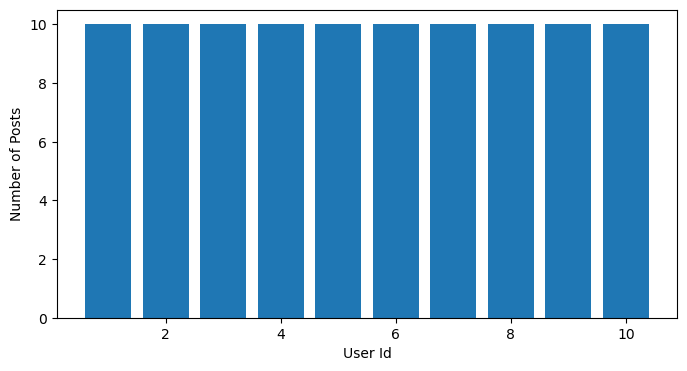

In [15]:
import matplotlib.pyplot as plt
user_counts = df['userId'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(user_counts.index,user_counts.values)
plt.xlabel('User Id')
plt.ylabel('Number of Posts')
plt.show()

USING PRIVATE API

In [48]:
api_key ="........................." #generated from openweathermap
city='karachi'
url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

In [43]:
response=requests.get(url)
print(response.status_code)
data=response.json()

if response.status_code == 200:#200 TELLS THAT THE DATA IS SUCCESSFULLY FETCHED
    print('Success')
    print(data)
else:
    print('error:',data) #ELSE IT PRINTS 401

200
Success
{'coord': {'lon': 74.3436, 'lat': 31.5497}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 23.99, 'feels_like': 23.75, 'temp_min': 23.99, 'temp_max': 23.99, 'pressure': 1008, 'humidity': 50, 'sea_level': 1008, 'grnd_level': 984}, 'visibility': 1500, 'wind': {'speed': 5.14, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1762235749, 'sys': {'type': 1, 'id': 7585, 'country': 'PK', 'sunrise': 1762219255, 'sunset': 1762258285}, 'timezone': 18000, 'id': 1172451, 'name': 'Lahore', 'cod': 200}


city: karachi
temperature: 28.9°C
humidity: 51%


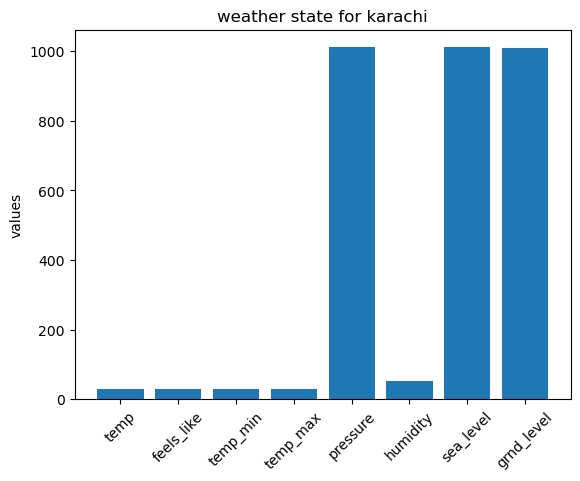

In [25]:
main = data['main']
print(f"city: {city}")
print(f"temperature: {main['temp']}°C")
print(f"humidity: {main['humidity']}%")

#bar chart
plt.bar(main.keys(),main.values())
plt.title(f'weather state for {city}')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.show()

In [32]:
weather_info = {
    'city': data['name'],
    'temperature(°C)':data['main']['temp'],
    'feels_like(°C)':data['main']['feels_like'],
    'humidity(%)':data['main']['humidity'],
    'pressure(hPa)':data['main']['pressure'],
    'weather': data['weather'][0]['description'],
    'wind_speed (m/s)': data['wind']['speed']
}

In [33]:
df=pd.DataFrame([weather_info])
df

,city,temperature(°C),feels_like(°C),humidity(%),pressure(hPa),weather,wind_speed (m/s)
0,Karachi,28.9,29.65,51,1011,haze,3.6
